# Imports and variables

In [20]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table

In [3]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Drop.",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Wine Quality Red \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [4]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [5]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
distr_ls = ["drn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [6]:
export = True
save_dir = os.path.join("plots", "results")

# Get truncation scores

In [8]:
# Get all skills table
data_path = os.path.join("..", "..", "04_Experiments", "Normal")
df_scores_norm, df_skills_norm = get_scores_skills_table(data_path, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

dataset_ls_tnorm = [
    "naval",
    "wine",
]
data_path = data_path.replace("Normal", "t_Normal")
df_scores_tnorm, df_skills_tnorm = get_scores_skills_table(data_path, dataset_ls_tnorm, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

data_path = data_path.replace("t_Normal", "0t_Normal")
df_scores_0tnorm, df_skills_0tnorm = get_scores_skills_table(data_path, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

df_scores_norm["distr"] = "norm"
df_skills_norm["distr"] = "norm"
df_scores_tnorm["distr"] = "tnorm"
df_skills_tnorm["distr"] = "tnorm"
df_scores_0tnorm["distr"] = "0tnorm"
df_skills_0tnorm["distr"] = "0tnorm"

In [9]:
df_scores = pd.concat([df_scores_norm, df_scores_tnorm, df_scores_0tnorm], ignore_index=True)
df_skills = pd.concat([df_skills_norm, df_skills_tnorm, df_skills_0tnorm], ignore_index=True)

In [10]:
distr_ls = ["norm", "0tnorm", "tnorm"]

### Analyze ensemble mean

In [11]:
df_scores[df_scores["agg"] == "ens"]

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,distr
5,rand_init,boston,drn,ens,1.885649,1.886280,1.885748,1.886753,1.886237,1.886133,norm
11,rand_init,concrete,drn,ens,5.959645,5.972985,5.975352,5.965418,5.958221,5.966324,norm
17,rand_init,energy,drn,ens,1.566606,1.564398,1.563367,1.565065,1.565651,1.565017,norm
23,rand_init,kin8nm,drn,ens,0.050206,0.050150,0.050393,0.050330,0.050401,0.050296,norm
29,rand_init,naval,drn,ens,0.001574,0.001631,0.001635,0.001625,0.001629,0.001619,norm
...,...,...,...,...,...,...,...,...,...,...,...
815,concrete_dropout,naval,drn,ens,0.008753,0.008759,0.008765,0.008762,0.008763,0.008760,0tnorm
821,concrete_dropout,power,drn,ens,19.624015,19.623850,19.625649,19.626437,19.624835,19.624957,0tnorm
827,concrete_dropout,protein,drn,ens,2.388007,2.388031,2.388192,2.388015,2.388067,2.388062,0tnorm
833,concrete_dropout,wine,drn,ens,0.410353,0.410230,0.410259,0.409990,0.409176,0.410002,0tnorm


# Final Plots

## Compare skills

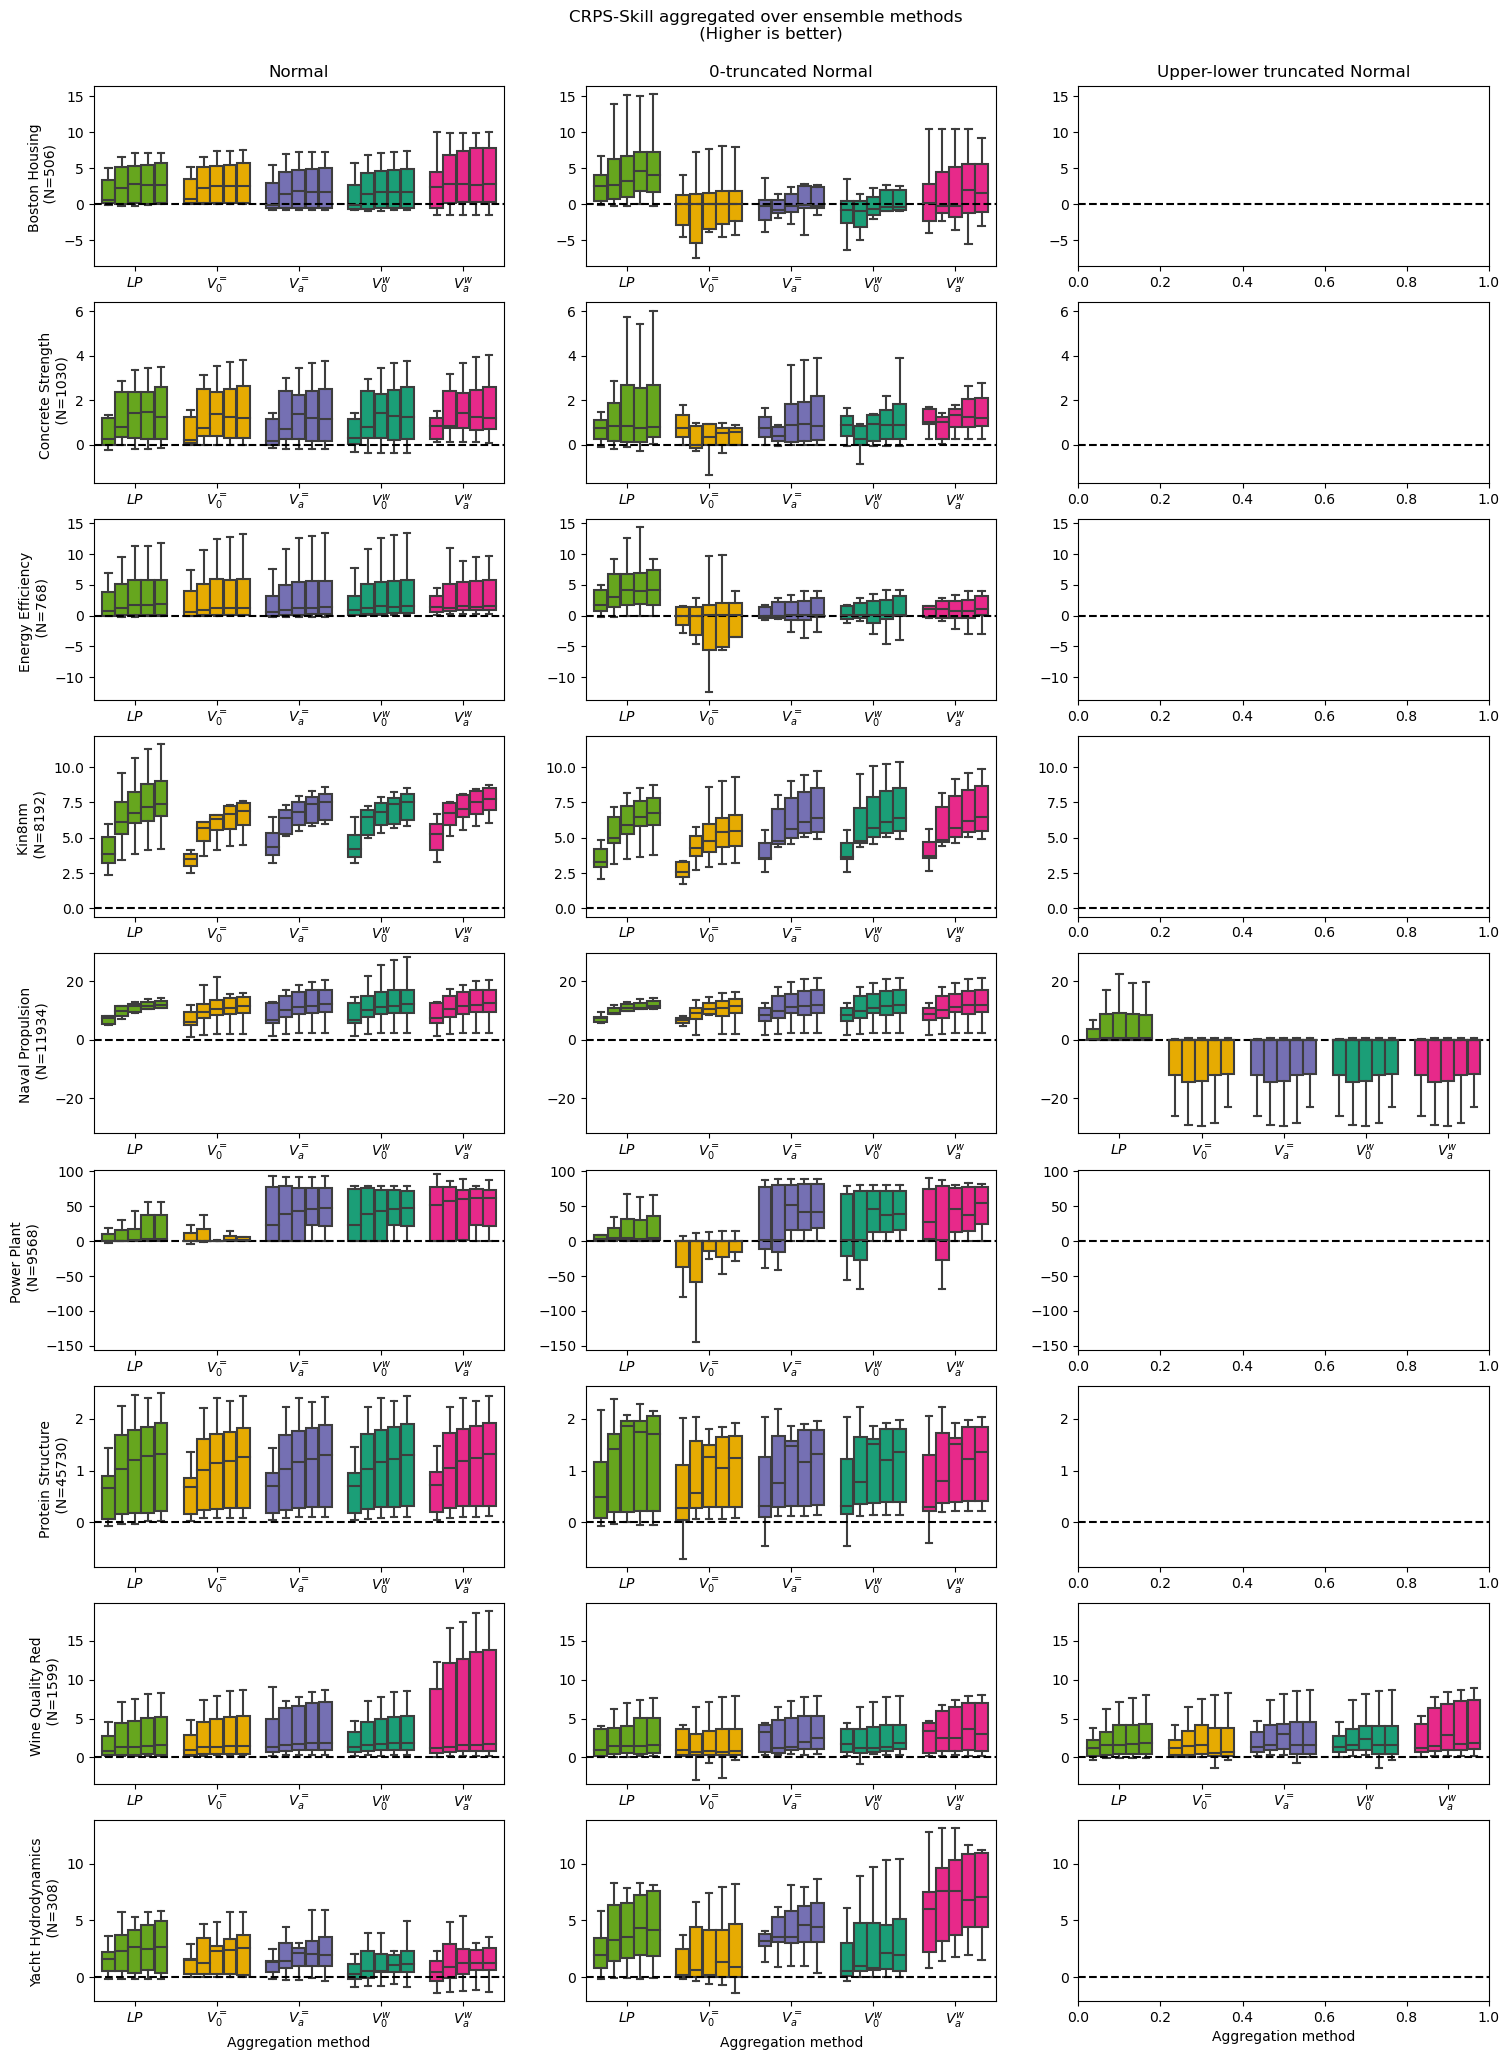

In [28]:
##### Skill - Boxplots - x=aggregation_methods #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(18,18*1.4), squeeze=False)

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    df_distr = df_skills[df_skills["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[(df_distr["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_distr_dataset, id_vars=["ens_method", "dataset", "distr", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            axs[i_dataset][i_distr].axhline(0, linestyle="--", color=kit_cols_dict["black"])
            continue
    
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_distr], data=df_final,
                 y="skill", x="agg", hue="ensemble_size", showfliers=False)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Aggregation method")

        # Change color
        boxplots = axs[i_dataset][i_distr].patches
        agg_col_ls = list(agg_col.values())[:5]
        for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
            boxplot.set_facecolor(agg_col_ls[i//5])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(min(norm_l, t0norm_l, tnorm_l), max(norm_u, t0norm_u, tnorm_u))
    ax_0tnorm.set_ylim(min(norm_l, t0norm_l, tnorm_l), max(norm_u, t0norm_u, tnorm_u))
    ax_tnorm.set_ylim(min(norm_l, t0norm_l, tnorm_l), max(norm_u, t0norm_u, tnorm_u))

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.87)
fig.suptitle(f"CRPS-Skill aggregated over ensemble methods \n (Higher is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "06_skill_boxplot_per_agg_no_outliers.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "06_skill_boxplot_per_agg_no_outliers.png")
    fig.savefig(filename, bbox_inches='tight')

## Get best score per dataset

In [16]:
best_scores = df_scores.sort_values(["dataset", "score_10"], ascending=True).groupby("dataset").head(1)
df_scores["rel_score"] = df_scores.apply(lambda row: float(row["score_10"] / best_scores[best_scores["dataset"] == row["dataset"]]["score_10"]), axis=1)

In [36]:
best_scores

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,distr
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192,norm
576,batchensemble,concrete,drn,lp,4.807906,4.834749,4.774216,4.778541,4.759727,4.791028,0tnorm
639,bayesian,energy,drn,vi-w,1.553452,1.553084,1.552722,1.553004,1.552926,1.553038,0tnorm
346,concrete_dropout,kin8nm,drn,vi-aw,0.047664,0.046642,0.046209,0.046010,0.045894,0.046484,norm
78,bagging,naval,drn,lp,0.001407,0.001384,0.001378,0.001380,0.001380,0.001386,norm
658,bayesian,power,drn,vi-aw,2.401428,2.397910,2.397493,2.397222,2.396780,2.398167,0tnorm
826,concrete_dropout,protein,drn,vi-aw,2.381925,2.380976,2.380785,2.380680,2.380581,2.380990,0tnorm
384,rand_init,wine,drn,lp,0.353752,0.352950,0.353191,0.353009,0.352615,0.353103,tnorm
156,batchensemble,yacht,drn,lp,1.631673,1.644962,1.596771,1.582200,1.582375,1.607596,norm


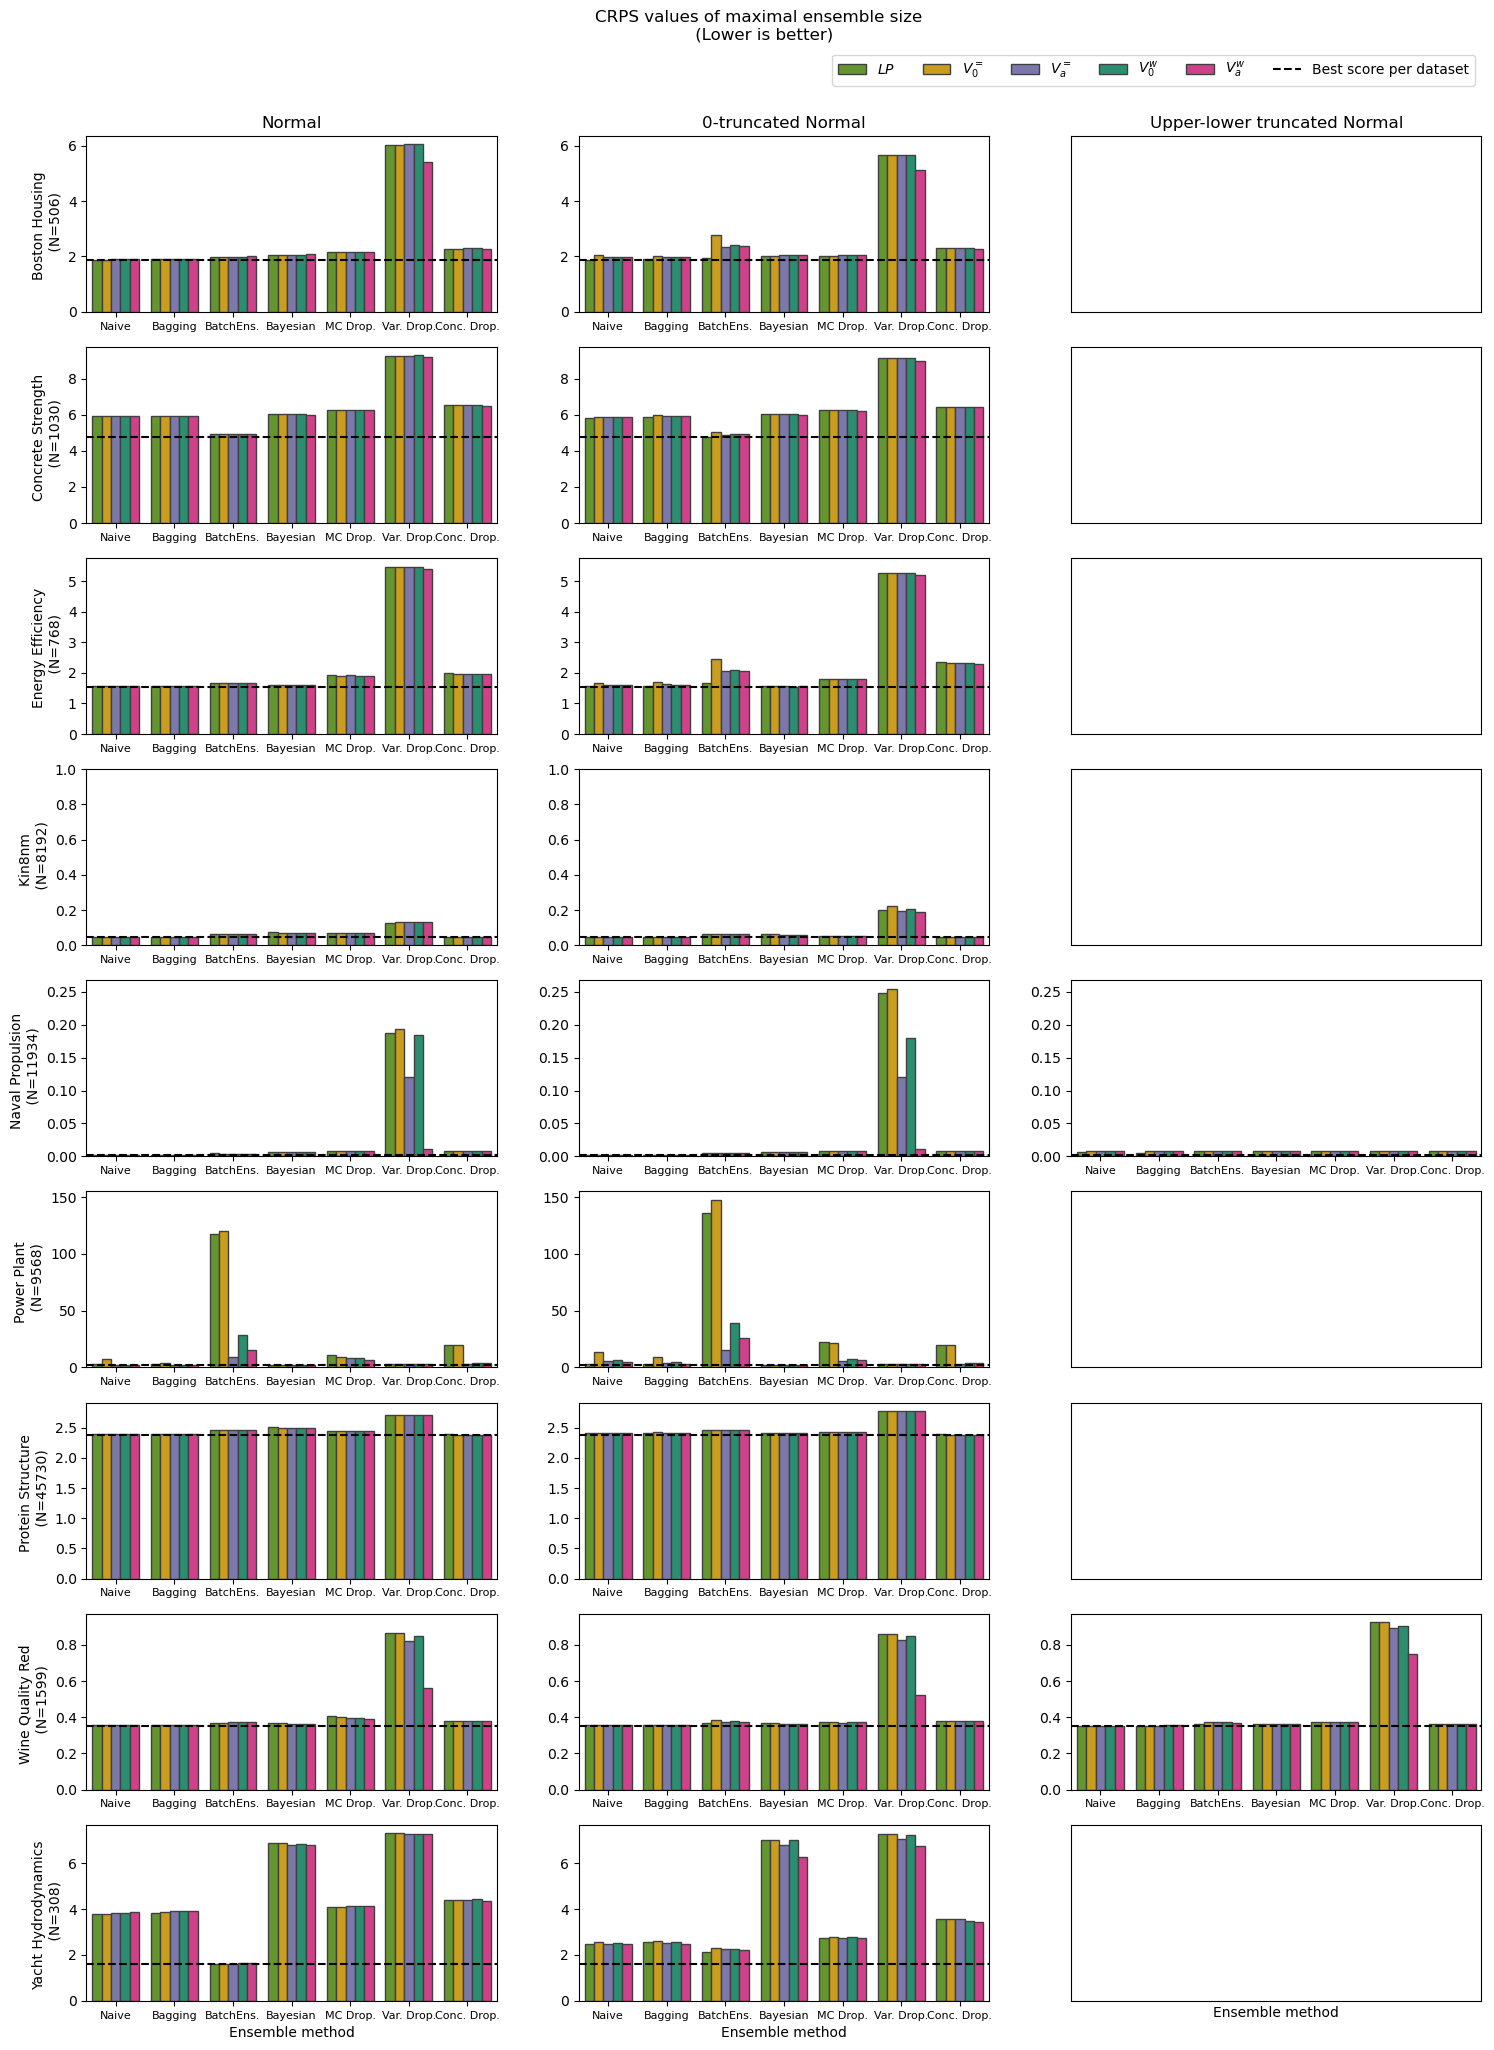

In [34]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(18,18*1.4), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_no_ens[df_no_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        # Get best score for dataset
        best_score = best_scores[best_scores["dataset"] == dataset]["score_10"].iloc[0]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            # axs[i_dataset][i_distr].axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
            axs[i_dataset][i_distr].tick_params(axis="both", which="both", left=False, labelleft=False, bottom=False, labelbottom=False)
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="score_10", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(best_score, linestyle="--", color="black")
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = np.Inf
# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.885), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS values of maximal ensemble size \n (Lower is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "06_scores.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "06_scores.png")
    fig.savefig(filename, bbox_inches='tight')

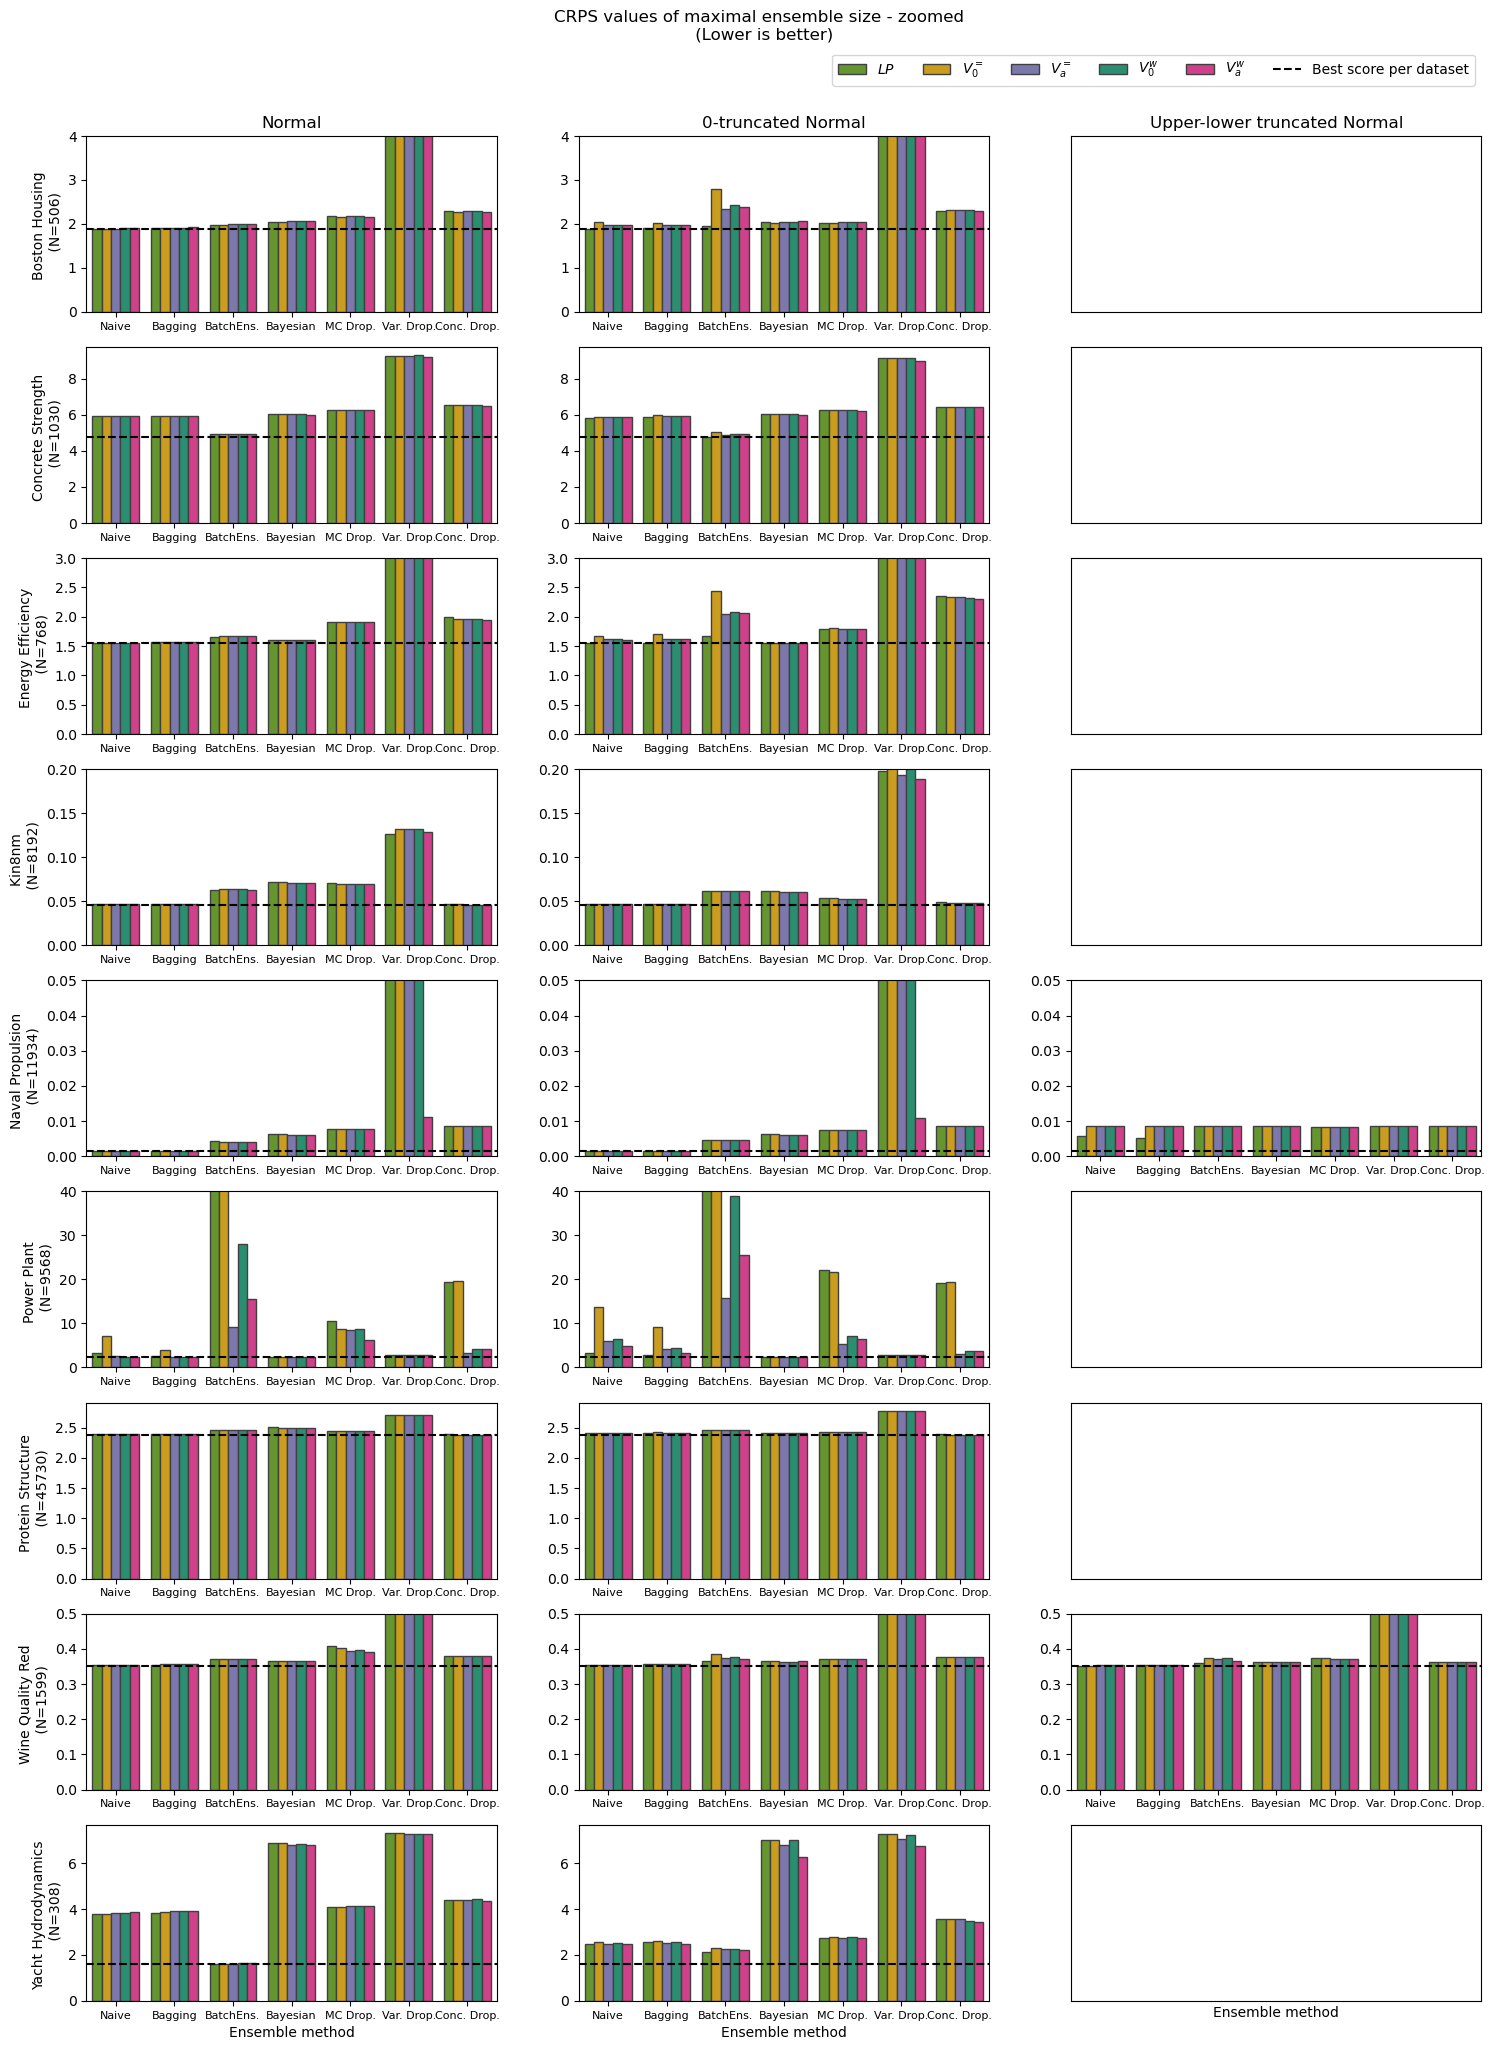

In [35]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(18,18*1.4), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_no_ens[df_no_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        # Get best score for dataset
        best_score = best_scores[best_scores["dataset"] == dataset]["score_10"].iloc[0]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            # axs[i_dataset][i_distr].axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
            axs[i_dataset][i_distr].tick_params(axis="both", which="both", left=False, labelleft=False, bottom=False, labelbottom=False)
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="score_10", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = {
    "boston": 4,
    "concrete": 10,
    "energy": 3,
    "kin8nm": 0.2,
    "naval": 0.05,
    "power": 40,
    "protein": np.Inf,
    "wine": 0.5,
    "yacht": np.Inf,
}
for idx, (ax_norm, ax_0tnorm, ax_tnorm) in enumerate(axs):
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    upper_limit_curr = list(upper_limit.values())[idx]
    
    ax_norm.set_ylim(0, min(upper_limit_curr, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0, min(upper_limit_curr, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0, min(upper_limit_curr, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.885), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS values of maximal ensemble size - zoomed \n (Lower is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "06_scores_zoomed.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "06_scores_zoomed.png")
    fig.savefig(filename, bbox_inches='tight')

# Archive

In [ ]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(20,20), squeeze=False)

# Filter out ensemble mean
df_ens = df_scores[df_scores["agg"] == "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_ens[df_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            axs[i_dataset][i_distr].axhline(1, linestyle="--", color=kit_cols_dict["black"])
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="rel_score", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(1, linestyle="--", color="black")
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = 100
# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(0.95, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0.95, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0.95, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))
fig.suptitle(f"Relative score to best score per dataset (Cut-off: {upper_limit})")

# Save figure
# if export:
#     filename=os.path.join(save_dir, "06_relative_scores.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "06_relative_scores.png")
#     fig.savefig(filename, bbox_inches='tight')